## Facility opening impact

In [ ]:
!pip3 install ortools

In [ ]:
from ortools.linear_solver import pywraplp

def solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact):
    num_facilities = len(locations)
    num_customers = len(customers)

    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Variables
    open_vars = [solver.IntVar(0, 1, 'open[%d]' % i) for i in range(num_facilities)]
    assign_vars = [[solver.IntVar(0, 1, 'assign[%d,%d]' % (i, j)) for j in range(num_customers)] for i in range(num_facilities)]

    # Objective: minimize total costs
    solver.Minimize(solver.Sum(opening_costs[i] * open_vars[i] for i in range(num_facilities)) +
                    solver.Sum(transportation_costs[i][j] * assign_vars[i][j] for i in range(num_facilities) for j in range(num_customers)) +
                    solver.Sum(environmental_impact[i] * open_vars[i] for i in range(num_facilities)))

    # Constraints:
    # 1. Each customer must be assigned to exactly one facility
    for j in range(num_customers):
        solver.Add(solver.Sum(assign_vars[i][j] for i in range(num_facilities)) == 1)

    # 2. Capacity constraint for each facility
    for i in range(num_facilities):
        solver.Add(solver.Sum(demand[j] * assign_vars[i][j] for j in range(num_customers)) <= capacity[i] * open_vars[i])

    # Solve the problem
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        total_cost = solver.Objective().Value()
        assignment = [[assign_vars[i][j].solution_value() for j in range(num_customers)] for i in range(num_facilities)]
        opened_facilities = [open_vars[i].solution_value() for i in range(num_facilities)]
        return total_cost, assignment, opened_facilities
    else:
        return None

# Example data
locations = [(0, 0), (15, 15), (1, 20), (30, 30)]  # Coordinates of facilities
customers = [(5, 5), (6, 15), (15, 25), (24, 35)]  # Coordinates of customers
opening_costs = [100, 150, 200, 250]               # Fixed costs for opening facilities
capacity = [320, 400, 400, 500]                     # Capacity of facilities
demand = [50, 70, 90, 110]                          # Demand of customers
transportation_costs = [[10, 15, 20, 25],           # Transportation costs from facilities to customers
                        [15, 10, 25, 30],
                        [20, 25, 10, 35],
                        [25, 30, 35, 10]]
environmental_impact = [5, 8, 10, 12]               # Environmental impact of facilities


# Solve the problem
result = solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact)

if result:
    total_cost, assignment, opened_facilities = result
    print("Total Cost:", total_cost)
    print("Facilities Opened:", opened_facilities)
    print("Assignment Matrix:")
    for i in range(len(assignment)):
        print(assignment[i])
else:
    print("No solution found.")


[[assign[0,0], assign[0,1], assign[0,2], assign[0,3]], [assign[1,0], assign[1,1], assign[1,2], assign[1,3]], [assign[2,0], assign[2,1], assign[2,2], assign[2,3]], [assign[3,0], assign[3,1], assign[3,2], assign[3,3]]]
Total Cost: 175.0
Facilities Opened: [1.0, 0.0, 0.0, 0.0]
Assignment Matrix:
[1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


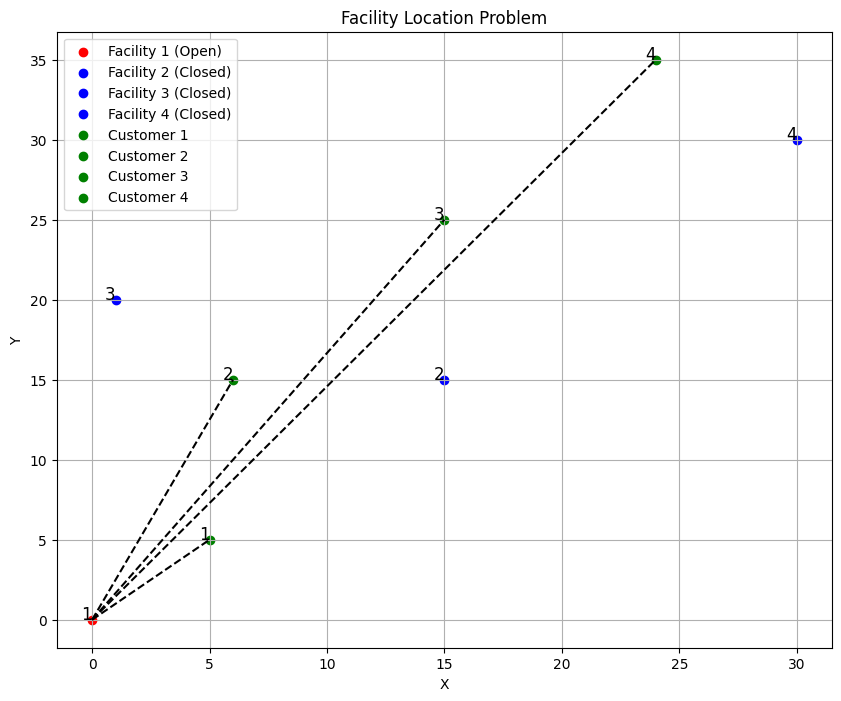

In [ ]:
import matplotlib.pyplot as plt

def plot_solution(locations, customers, assignment, opened_facilities):
    plt.figure(figsize=(10, 8))

    # Plot facilities
    for i, (x, y) in enumerate(locations):
        if opened_facilities[i] == 1:
            plt.scatter(x, y, color='red', label=f'Facility {i+1} (Open)')
        else:
            plt.scatter(x, y, color='blue', label=f'Facility {i+1} (Closed)')
        plt.text(x, y, f'{i+1}', fontsize=12, ha='right')

    # Plot customers
    for j, (x, y) in enumerate(customers):
        plt.scatter(x, y, color='green', label=f'Customer {j+1}')
        plt.text(x, y, f'{j+1}', fontsize=12, ha='right')

    # Plot connections between facilities and customers based on assignment
    for i in range(len(locations)):
        for j in range(len(customers)):
            if assignment[i][j] == 1:
                plt.plot([locations[i][0], customers[j][0]], [locations[i][1], customers[j][1]], color='black', linestyle='--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Facility Location Problem')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
result = solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact)
if result:
    total_cost, assignment, opened_facilities = result
    plot_solution(locations, customers, assignment, opened_facilities)
